# Amazon Prime dataset

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:/Users/AJITHA REDDY/Downloads/Amazon-prime-keywords-enhanced.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10851 non-null  object 
 1   Title                   10851 non-null  object 
 2   Type                    10851 non-null  object 
 3   Description             10851 non-null  object 
 4   Release_year            10851 non-null  float64
 5   Age_certification       10851 non-null  object 
 6   Duration                10851 non-null  float64
 7   Genres                  10851 non-null  object 
 8   Production_countries    10851 non-null  object 
 9   Seasons                 10851 non-null  float64
 10  Imdb_id                 10371 non-null  object 
 11  Rating                  10851 non-null  float64
 12  Imdb_votes              10851 non-null  float64
 13  Tmdb_popularity         10851 non-null  float64
 14  Tmdb_score              10851 non-null

In [4]:
df.shape

(10865, 30)

In [5]:
df.columns

Index(['Id', 'Title', 'Type', 'Description', 'Release_year',
       'Age_certification', 'Duration', 'Genres', 'Production_countries',
       'Seasons', 'Imdb_id', 'Rating', 'Imdb_votes', 'Tmdb_popularity',
       'Tmdb_score', 'User_ID', 'Watch_History', 'Watch_Duration',
       'User_Rating', 'Search_Click_History', 'Skipped_Content', 'Director',
       'Cast', 'Keywords_Tags', 'Streaming_Availability', 'Language',
       'Trending_Score', 'Seasonal_Popularity', 'User_Age',
       'Friends_Watch_History'],
      dtype='object')

In [6]:
df.head()

,Id,Title,Type,Description,Release_year,Age_certification,Duration,Genres,Production_countries,Seasons,...,Skipped_Content,Director,Cast,Keywords_Tags,Streaming_Availability,Language,Trending_Score,Seasonal_Popularity,User_Age,Friends_Watch_History
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946.0,PG,130.0,"drama, family, fantasy, romance, comedy",US,0.0,...,Mesa of Lost Women,Director_94,"Actor_152, Actor_206","entire, george's, holiday",Amazon Prime,English,32.803396,Low,38,The Kaos Brief
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933.0,Unknown,69.0,"comedy, war",US,0.0,...,The Dude Ranger,Director_100,"Actor_14, Actor_379","rufus, firefly, named",Netflix,English,61.464761,Medium,35,Shankar Guru
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940.0,Unknown,92.0,"drama, romance, comedy",US,0.0,...,A Stalker in the House,Director_5,"Actor_129, Actor_312","walter, that, hildy,",Netflix,English,74.150382,High,19,Secret of Deep Harbor
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"comedy, family",US,26.0,...,"Mitzi... What's Hot, What's Not",Director_24,"Actor_166, Actor_351","were, stooges, their",Amazon Prime,English,49.889422,Low,32,Hate Story IV
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948.0,Unknown,133.0,"western, drama, romance, action",US,0.0,...,2 pigeons,Director_29,"Actor_173, Actor_311","dunson, cattle, matt",Netflix,English,49.183220,Low,20,Big Bully


## Data cleaning and pre-processing

In [7]:
##Handle Missing Values

# Check for missing values in each column
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Fill missing values for numerical columns with the median
numerical_columns = ['Release_Year', 'Duration', 'Seasons', 'Rating', 'Imdb_Votes', 'Tmdb_Popularity', 'Tmdb_Score', 'Watch_Duration', 'User_Rating', 'Trending_Score', 'User_Age']
for col in numerical_columns:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing values for categorical columns with 'Unknown'
categorical_columns = ['Age_Certification', 'Genres', 'Production_Countries', 'Director', 'Cast', 'Keywords_Tags', 'Streaming_Availability', 'Language', 'Seasonal_Popularity']
for col in categorical_columns:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

# Fill missing values for text columns with empty strings
text_columns = ['Title', 'Description']
for col in text_columns:
    if col in df.columns:
        df[col].fillna('', inplace=True)



Missing Values Before Cleaning:
Id                         14
Title                      14
Type                       14
Description                14
Release_year               14
Age_certification          14
Duration                   14
Genres                     14
Production_countries       14
Seasons                    14
Imdb_id                   494
Rating                     14
Imdb_votes                 14
Tmdb_popularity            14
Tmdb_score                 14
User_ID                     0
Watch_History              20
Watch_Duration              0
User_Rating                 0
Search_Click_History        6
Skipped_Content            16
Director                    0
Cast                        0
Keywords_Tags               0
Streaming_Availability      0
Language                    0
Trending_Score              0
Seasonal_Popularity         0
User_Age                    0
Friends_Watch_History      12
dtype: int64


C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\3006155754.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\3006155754.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [8]:
##Remove Duplicates

# Drop duplicate rows based on all columns
df.drop_duplicates(inplace=True)

In [9]:
## Clean Text Data
# Convert text columns to lowercase and remove extra spaces
text_columns = ['Title', 'Description', 'Genres', 'Keywords_Tags', 'Director', 'Cast']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()

In [10]:
# Ensure 'Age_Certification' column exists before replacing values
if 'Age_Certification' in df.columns:
    df['Age_Certification'] = df['Age_Certification'].replace(
        {'unknown': 'Unknown', 'not rated': 'Unknown'}
    ).fillna('Unknown')  # Optionally fill NaN values with 'Unknown'

In [11]:
# Ensure 'Type' column exists before modifying
if 'Type' in df.columns:
    df['Type'] = df['Type'].astype(str).str.strip().str.upper()
    df['Type'] = df['Type'].apply(lambda x: 'MOVIE' if x == 'MOVIE' else 'SHOW')

In [12]:
## Convert Data Types
# Ensure 'Release_Year' column exists
if 'Release_Year' in df.columns:
    df['Release_Year'] = pd.to_numeric(df['Release_Year'], errors='coerce')  # Convert, set errors to NaN
    df['Release_Year'] = df['Release_Year'].fillna(0).astype(int)  # Replace NaN with 0 (or drop rows)

In [13]:
# Convert 'Duration' to integer (assuming duration is in minutes)
df['Duration'] = df['Duration'].astype(int)

In [14]:
# Convert 'Seasons' to integer (for TV shows)
df['Seasons'] = df['Seasons'].astype(int)

In [15]:
## Handle Outliers (Optional)
# Remove rows where 'Duration' is less than 1 minute or greater than 300 minutes
df = df[(df['Duration'] >= 1) & (df['Duration'] <= 300)]

## Exploratory Data Analysis

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10861 entries, 0 to 10864
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10847 non-null  object 
 1   Title                   10860 non-null  object 
 2   Type                    10861 non-null  object 
 3   Description             10861 non-null  object 
 4   Release_year            10847 non-null  float64
 5   Age_certification       10847 non-null  object 
 6   Duration                10861 non-null  int32  
 7   Genres                  10861 non-null  object 
 8   Production_countries    10847 non-null  object 
 9   Seasons                 10861 non-null  int32  
 10  Imdb_id                 10367 non-null  object 
 11  Rating                  10861 non-null  float64
 12  Imdb_votes              10847 non-null  float64
 13  Tmdb_popularity         10847 non-null  float64
 14  Tmdb_score              10847

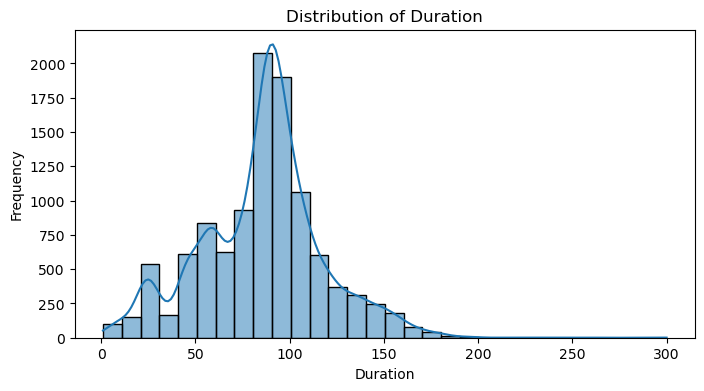

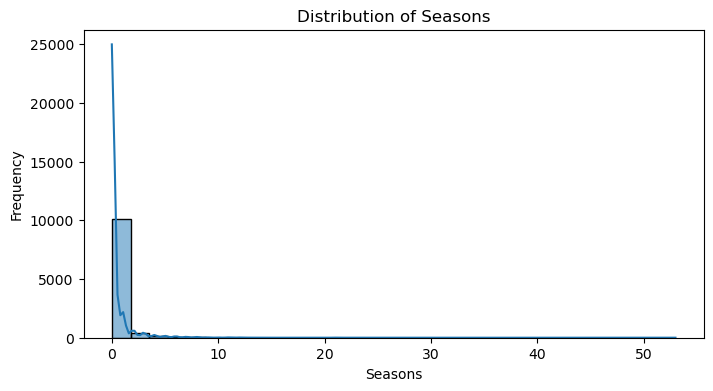

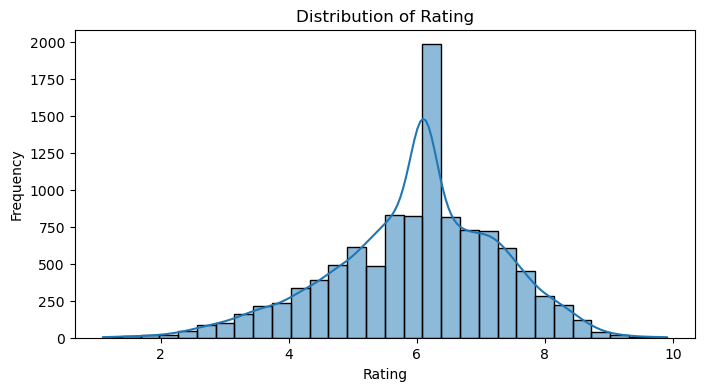

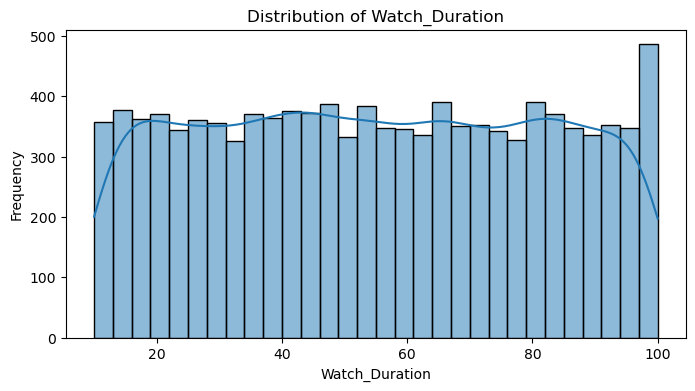

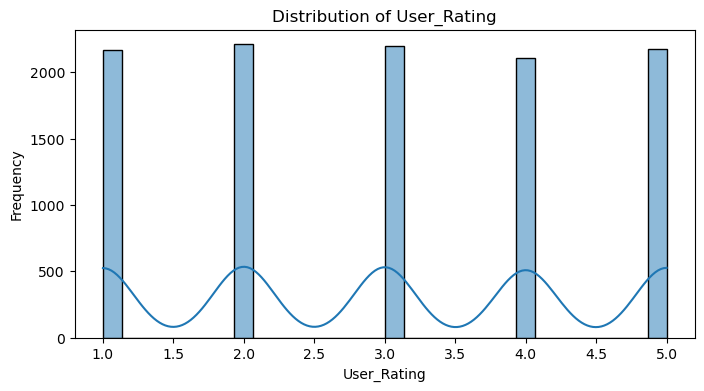

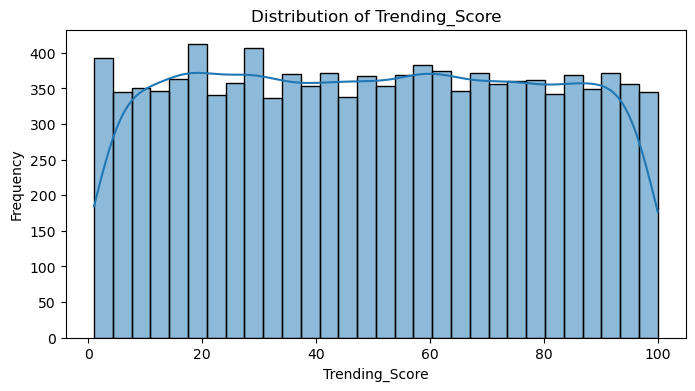

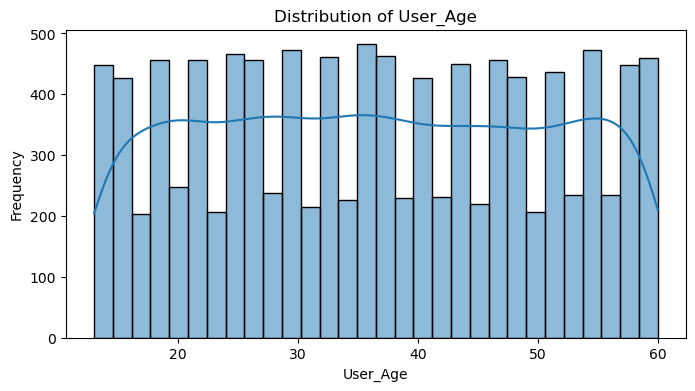

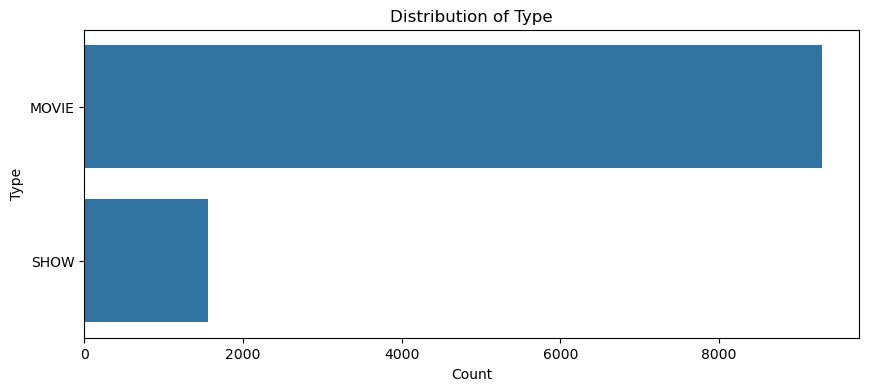

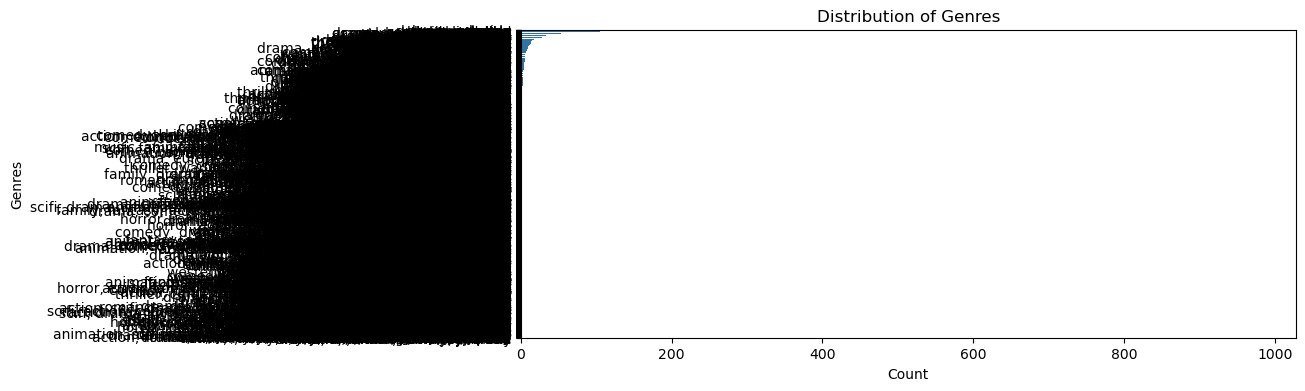

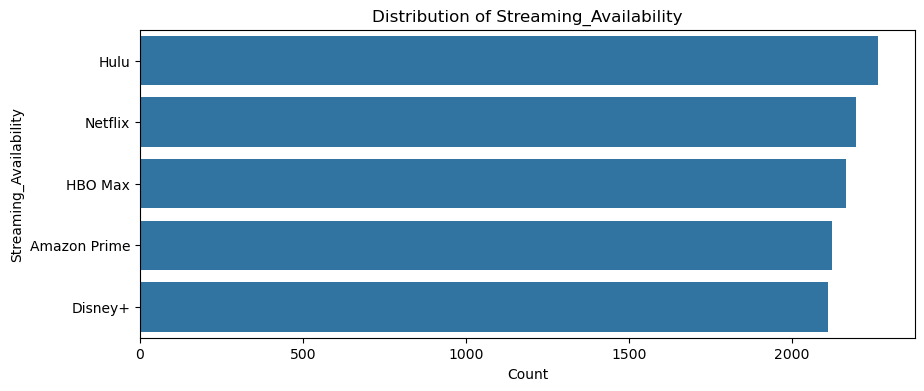

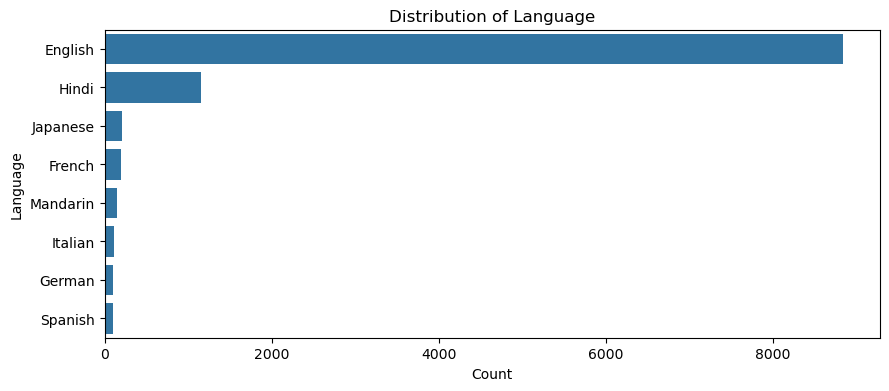

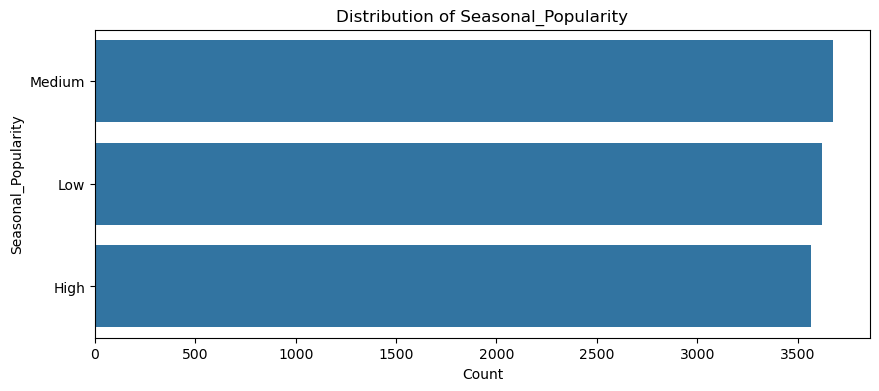

In [17]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

## Univariate Analysis
# Distribution of numerical features
numerical_columns = ['Release_Year', 'Duration', 'Seasons', 'Rating', 'Imdb_Votes', 'Tmdb_Popularity', 'Tmdb_Score', 'Watch_Duration', 'User_Rating', 'Trending_Score', 'User_Age']
for col in numerical_columns:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Distribution of categorical features
categorical_columns = ['Type', 'Age_Certification', 'Genres', 'Production_Countries', 'Streaming_Availability', 'Language', 'Seasonal_Popularity']
for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\349111024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_watched.values, y=top_watched.index, palette='viridis')


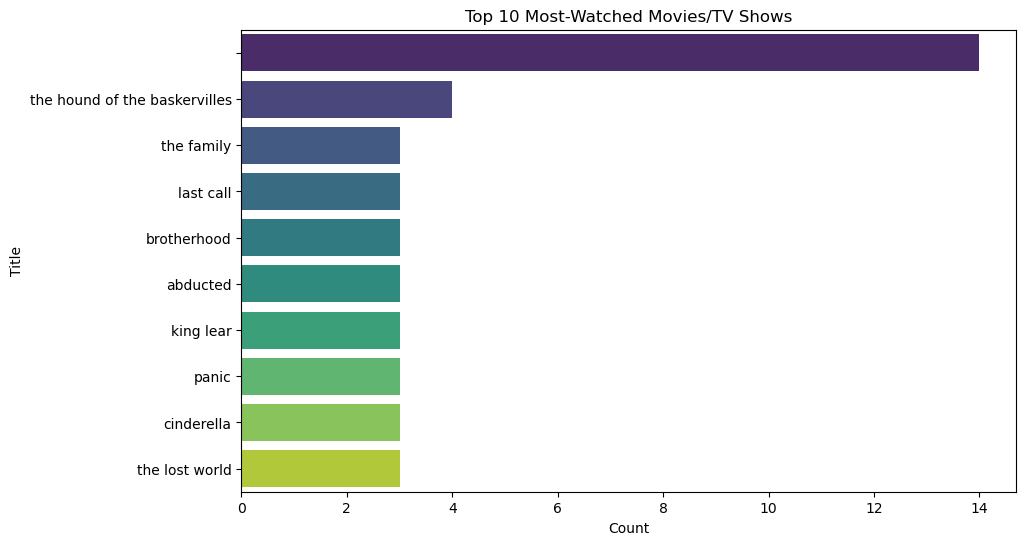

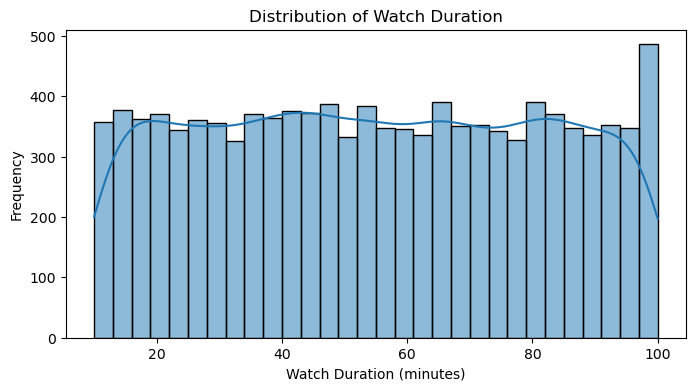

In [20]:
## Analyze User Behavior
# Top 10 most-watched movies/TV shows
top_watched = df['Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_watched.values, y=top_watched.index, palette='viridis')
plt.title('Top 10 Most-Watched Movies/TV Shows')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

# Distribution of watch duration
plt.figure(figsize=(8, 4))
sns.histplot(df['Watch_Duration'], kde=True, bins=30)
plt.title('Distribution of Watch Duration')
plt.xlabel('Watch Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\1014512868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres, order=genres.value_counts().index, palette='magma')


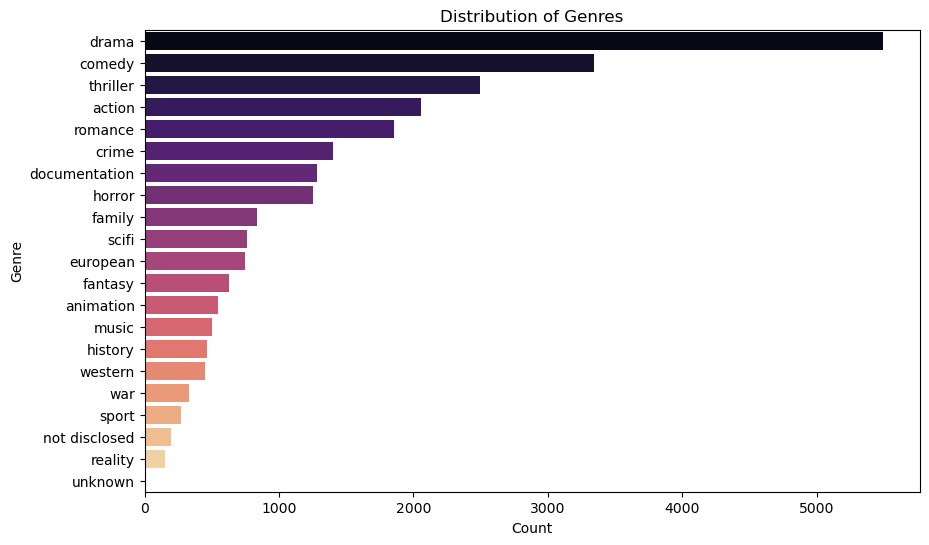

KeyError: 'Release_Year'

<Figure size 1000x600 with 0 Axes>

In [21]:
## Analyze Content Metadata
# Distribution of genres
genres = df['Genres'].str.split(', ', expand=True).stack()
plt.figure(figsize=(10, 6))
sns.countplot(y=genres, order=genres.value_counts().index, palette='magma')
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(df['Release_Year'], bins=30, kde=True, color='orange')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\3656746387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_by_rating.values, y=top_genres_by_rating.index, palette='plasma')


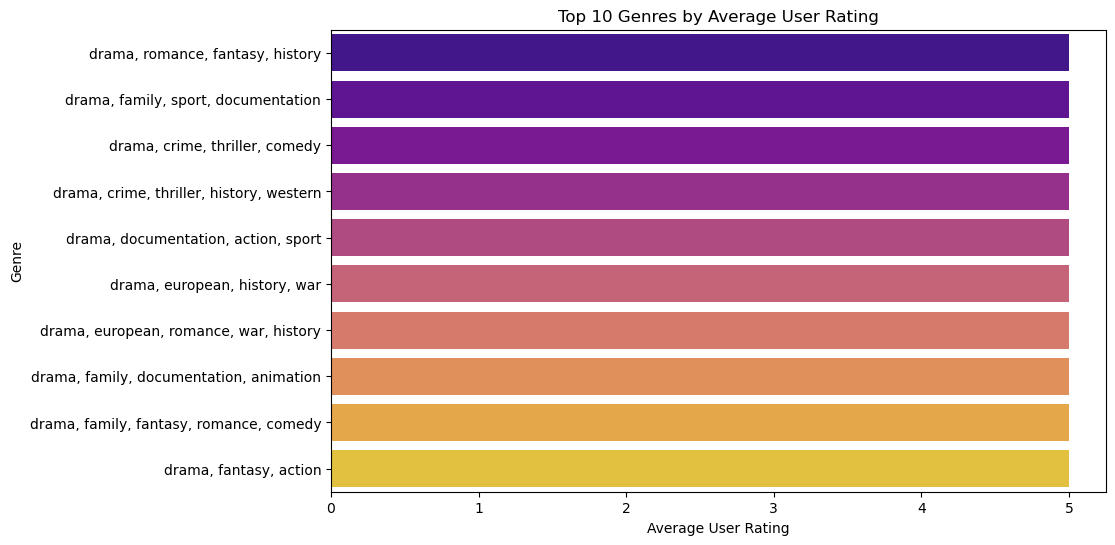

In [22]:
## Analyze User Preferences
# Top 10 genres by user rating
top_genres_by_rating = df.groupby('Genres')['User_Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_by_rating.values, y=top_genres_by_rating.index, palette='plasma')
plt.title('Top 10 Genres by Average User Rating')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.show()

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\1916116570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Streaming_Availability'], order=df['Streaming_Availability'].value_counts().index, palette='coolwarm')


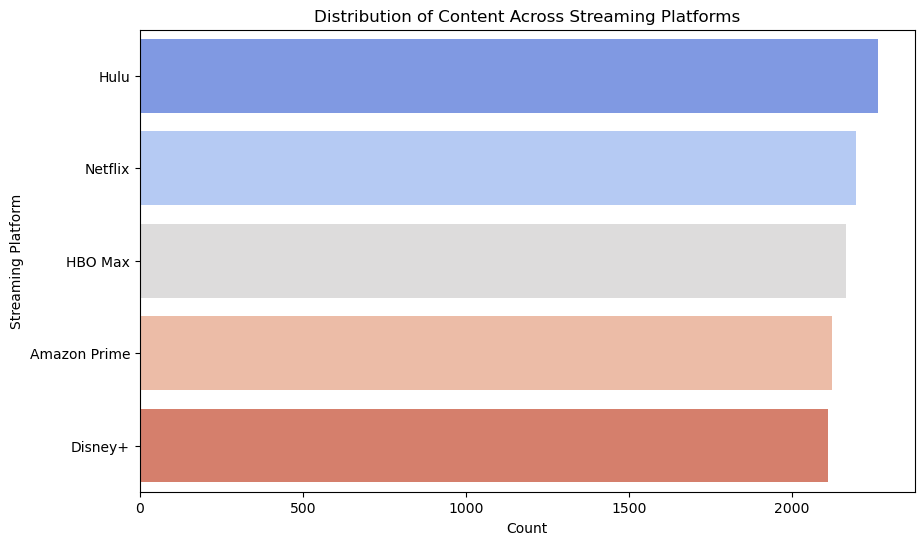

In [23]:
## Analyze Streaming Availability
# Distribution of content across streaming platforms
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Streaming_Availability'], order=df['Streaming_Availability'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Content Across Streaming Platforms')
plt.xlabel('Count')
plt.ylabel('Streaming Platform')
plt.show()

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\1842825609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Seasonal_Popularity'], order=df['Seasonal_Popularity'].value_counts().index, palette='Set2')


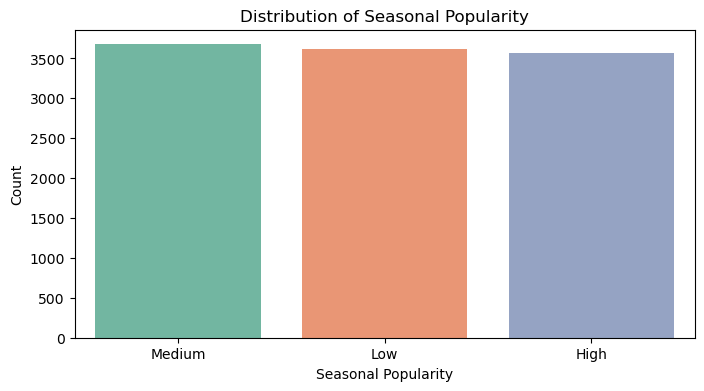

In [24]:
## Analyze Seasonal Popularity
# Distribution of seasonal popularity
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Seasonal_Popularity'], order=df['Seasonal_Popularity'].value_counts().index, palette='Set2')
plt.title('Distribution of Seasonal Popularity')
plt.xlabel('Seasonal Popularity')
plt.ylabel('Count')
plt.show()

Selected Numeric Columns:
Index(['Release_year', 'Duration', 'Seasons', 'Rating', 'Imdb_votes',
       'Tmdb_popularity', 'Tmdb_score', 'Watch_Duration', 'User_Rating',
       'Trending_Score', 'User_Age'],
      dtype='object')

Correlation Matrix:
                 Release_year  Duration   Seasons    Rating  Imdb_votes  \
Release_year         1.000000  0.058742  0.017822  0.027028    0.000389   
Duration             0.058742  1.000000 -0.341194 -0.096521    0.103580   
Seasons              0.017822 -0.341194  1.000000  0.194786    0.028218   
Rating               0.027028 -0.096521  0.194786  1.000000    0.156957   
Imdb_votes           0.000389  0.103580  0.028218  0.156957    1.000000   
Tmdb_popularity      0.036711 -0.018710  0.112726  0.052965    0.166645   
Tmdb_score           0.094353 -0.051740  0.159173  0.487352    0.137913   
Watch_Duration       0.008161 -0.004676  0.010348  0.002341    0.012420   
User_Rating          0.005667 -0.009646  0.009530 -0.006612   -0.009667   


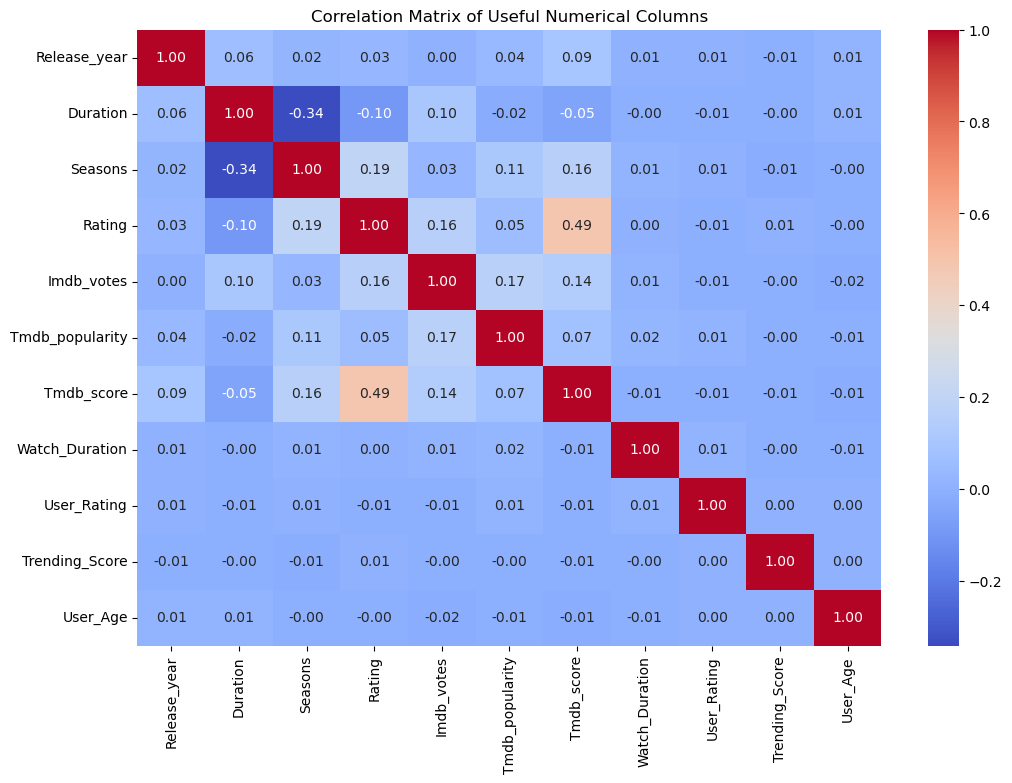

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Display the selected numeric columns
print("Selected Numeric Columns:")
print(numerical_data.columns)

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Useful Numerical Columns')
plt.show()

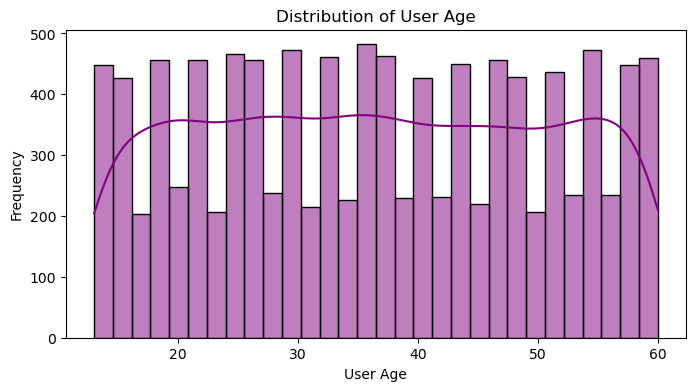

In [25]:
## Analyze User Demographics
# Distribution of user age
plt.figure(figsize=(8, 4))
sns.histplot(df['User_Age'], bins=30, kde=True, color='purple')
plt.title('Distribution of User Age')
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\700366543.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=friends_watch_history, order=friends_watch_history.value_counts().head(10).index, palette='viridis')


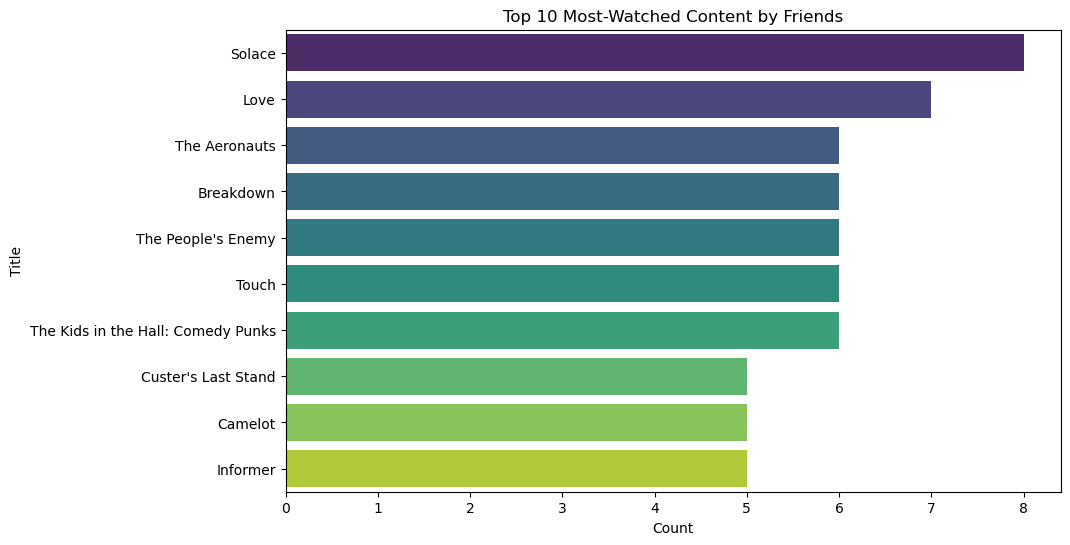

In [26]:
## Analyze Friends' Watch History
# Top 10 most-watched content by friends
friends_watch_history = df['Friends_Watch_History'].str.split(', ', expand=True).stack()
plt.figure(figsize=(10, 6))
sns.countplot(y=friends_watch_history, order=friends_watch_history.value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Most-Watched Content by Friends')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

In [49]:
# Basic Data Cleaning
df['Release_year'] = df['Release_year'].fillna(0).astype(int) # Handle missing release years

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\165789911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_counts.values, y=title_counts.index, palette="viridis")


NameError: name 'io' is not defined

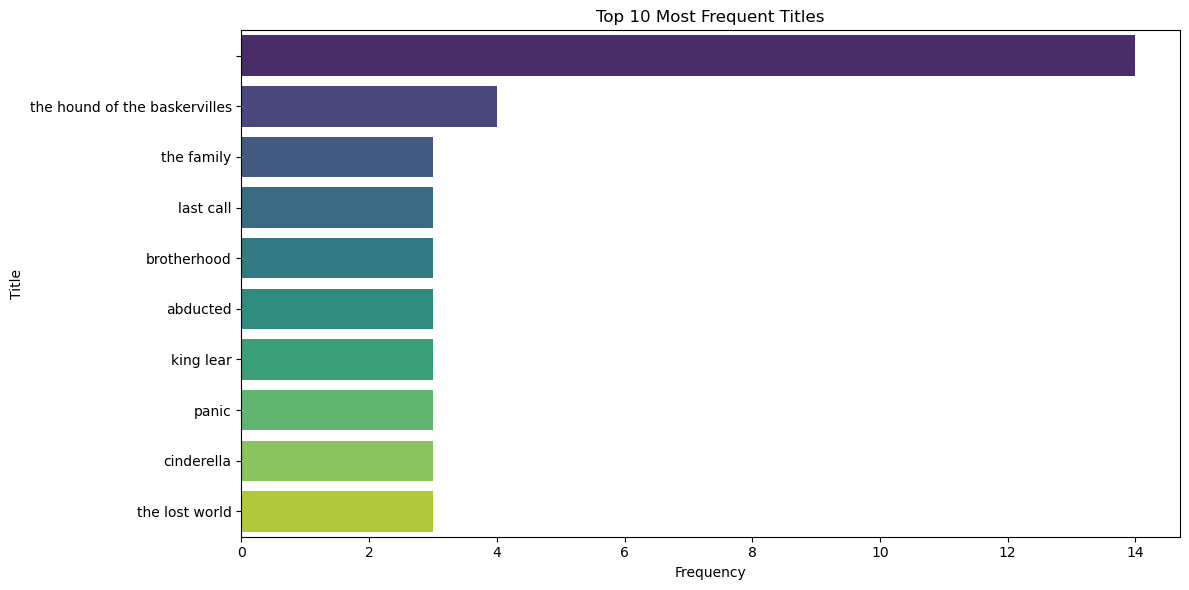

In [50]:
title_counts = df['Title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette="viridis")
plt.title("Top 10 Most Frequent Titles")
plt.xlabel("Frequency")
plt.ylabel("Title")
plt.tight_layout()
title_counts_plot = io.BytesIO()
plt.savefig(title_counts_plot, format='png')
plt.close()


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns of interest
numerical_columns = [
    'Watch_Duration', 'User_Rating', 'Tmdb_popularity', 'Tmdb_score',
    'Imdb_votes', 'Rating', 'Trending_Score', 'Seasonal_Popularity', 'User_Age'
]

# Filter the dataset to include only numerical columns
numerical_data = data[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Useful Numerical Columns')
plt.show()

ValueError: could not convert string to float: 'Low'

NameError: name 'io' is not defined

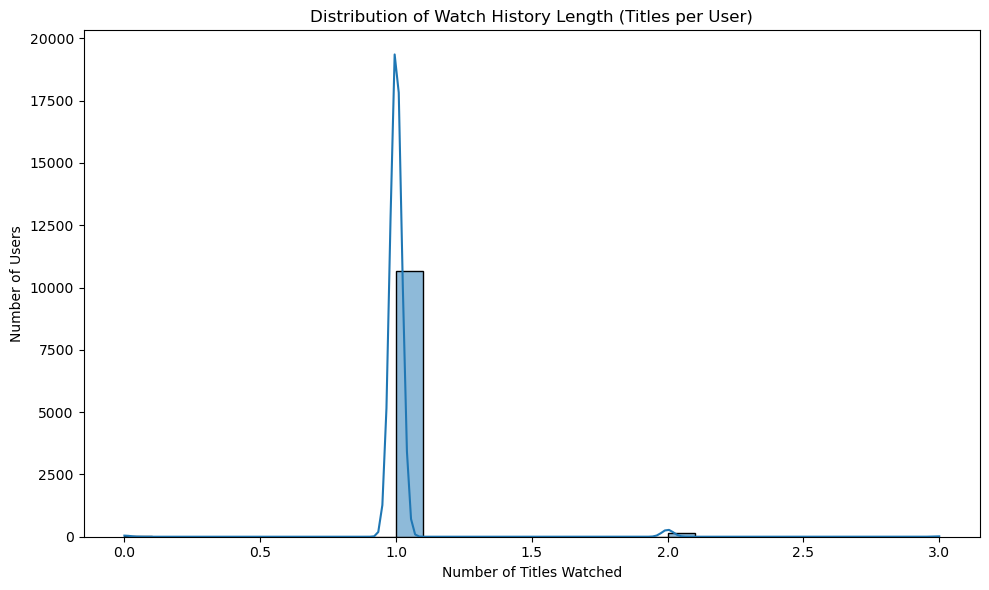

In [51]:
def count_titles(history):
    if isinstance(history, str):
        return len(history.split(','))
    else:
        return 0 # Or handle NaN/None values appropriately

df['Watch_History_Length'] = df['Watch_History'].apply(count_titles)

plt.figure(figsize=(10, 6))
sns.histplot(df['Watch_History_Length'], bins=30, kde=True)
plt.title("Distribution of Watch History Length (Titles per User)")
plt.xlabel("Number of Titles Watched")
plt.ylabel("Number of Users")
plt.tight_layout()
watch_history_plot = io.BytesIO()
plt.savefig(watch_history_plot, format='png')
plt.close()


NameError: name 'io' is not defined

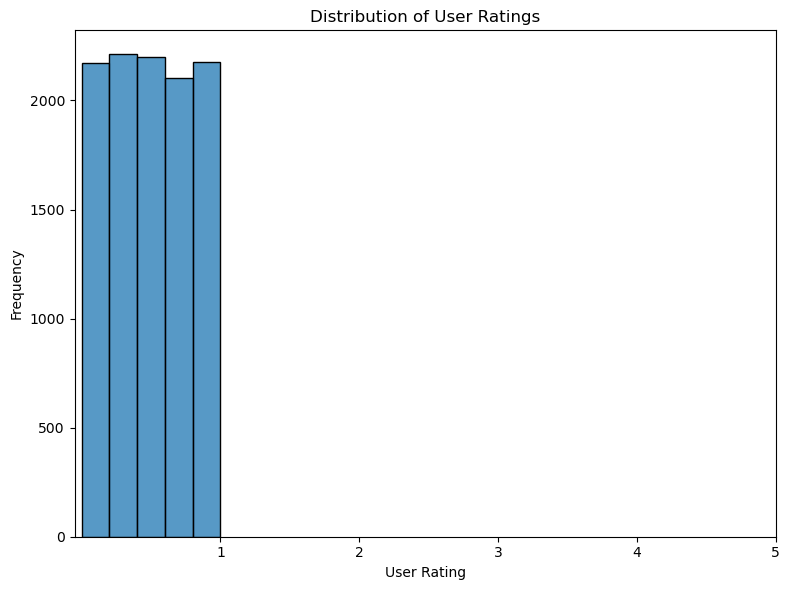

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(df['User_Rating'].dropna(), bins=5, kde=False) # Drop NaN values
plt.title("Distribution of User Ratings")
plt.xlabel("User Rating")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))
plt.tight_layout()
user_rating_plot = io.BytesIO()
plt.savefig(user_rating_plot, format='png')
plt.close()


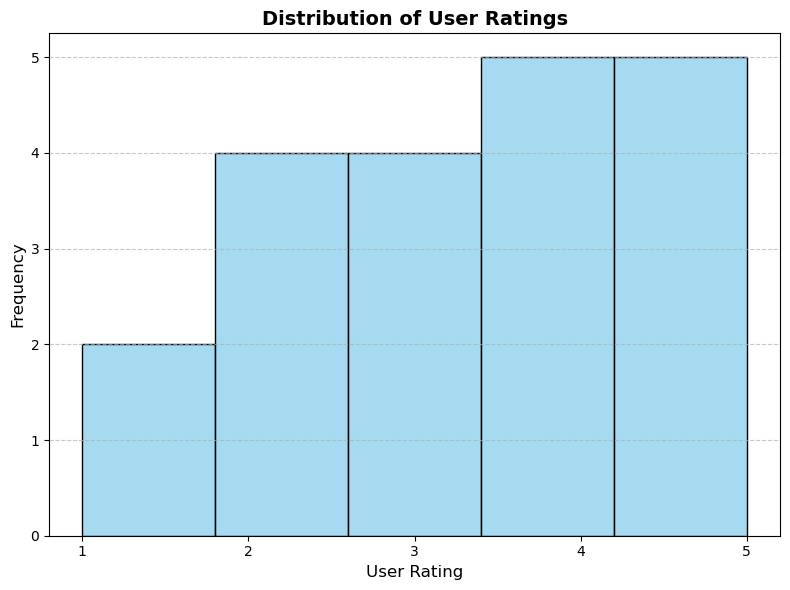

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io  # Import the io module

# Sample DataFrame (Replace with actual dataset)
df = pd.DataFrame({'User_Rating': [1, 2, 3, 4, 5, 3, 4, 2, 1, 5, 4, 3, 5, 2, 4, 3, 5, 5, 4, 2]})

# Plot Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['User_Rating'].dropna(), bins=5, kde=False, color="skyblue", edgecolor="black")  # Drop NaN values

# Customize Appearance
plt.title("Distribution of User Ratings", fontsize=14, fontweight="bold")
plt.xlabel("User Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(range(1, 6))  # Ensures only valid ratings (1-5) are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Adds light gridlines for better readability
plt.tight_layout()

# Show the plot
plt.show()


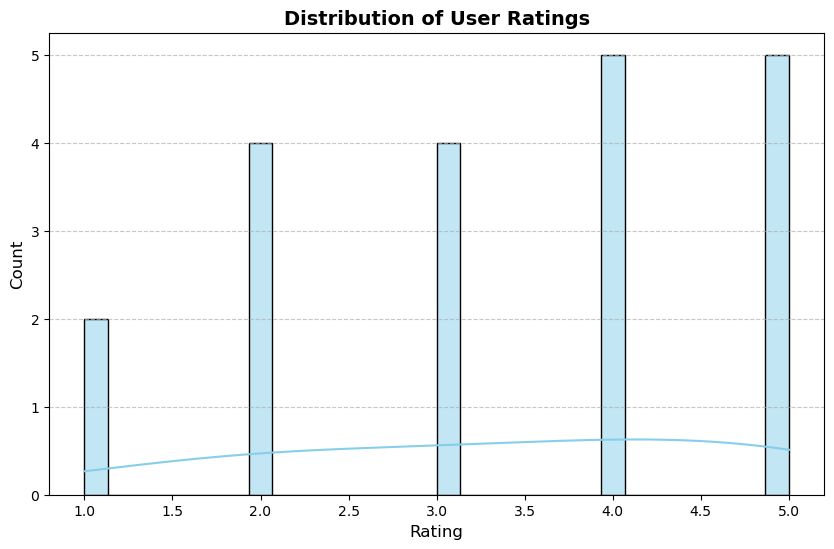

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['User_Rating'].dropna(), bins=30, kde=True, color="skyblue", edgecolor="black")  # kde=True for smooth density curve

# Customize appearance
plt.title("Distribution of User Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light grid for better readability

# Show the plot
plt.show()


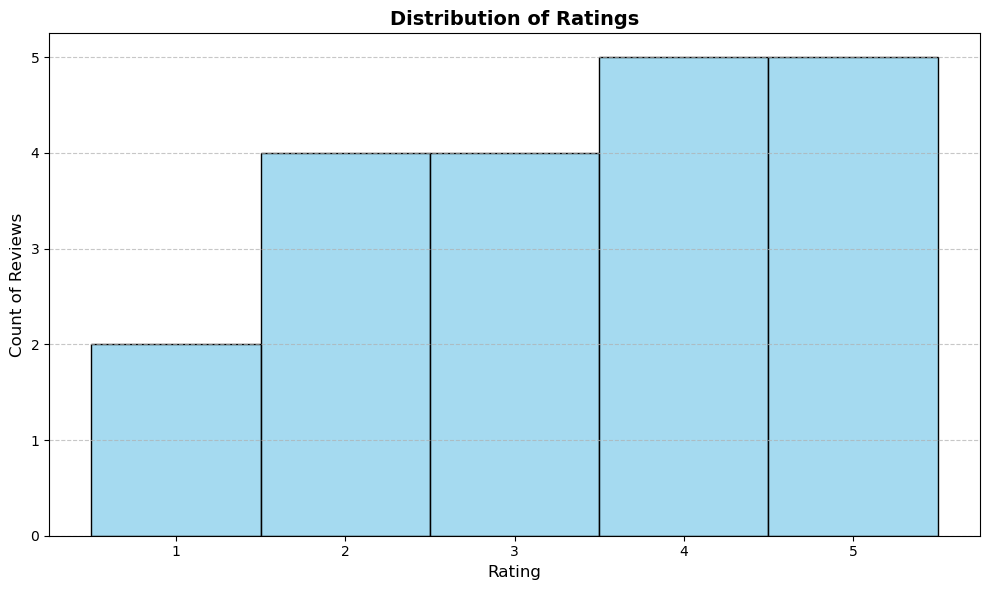

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['User_Rating'].dropna(), bins=5, discrete=True, kde=False, color="skyblue", edgecolor="black")

# Customize appearance
plt.title("Distribution of Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count of Reviews", fontsize=12)
plt.xticks(range(1, 6))  # Ensure only valid ratings (1-5) are displayed
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light grid for better readability
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'io' is not defined

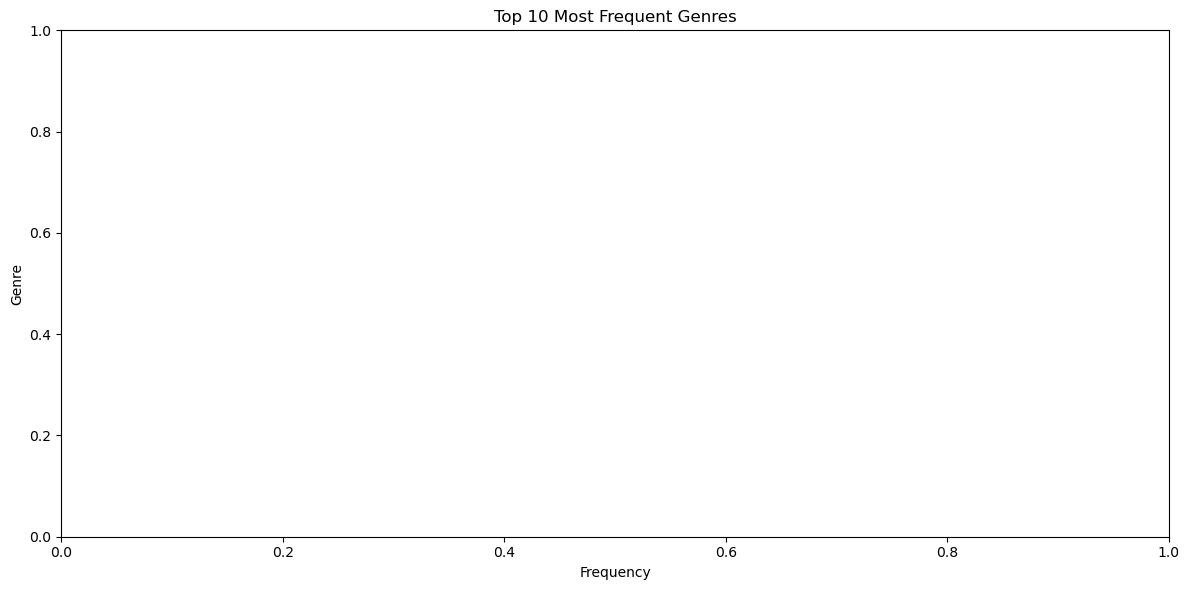

In [53]:
genre_counts = df['Genres'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.tight_layout()
genre_counts_plot = io.BytesIO()
plt.savefig(genre_counts_plot, format='png')
plt.close()


C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\620013660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_cert_counts.values, y=age_cert_counts.index, palette="coolwarm")


NameError: name 'io' is not defined

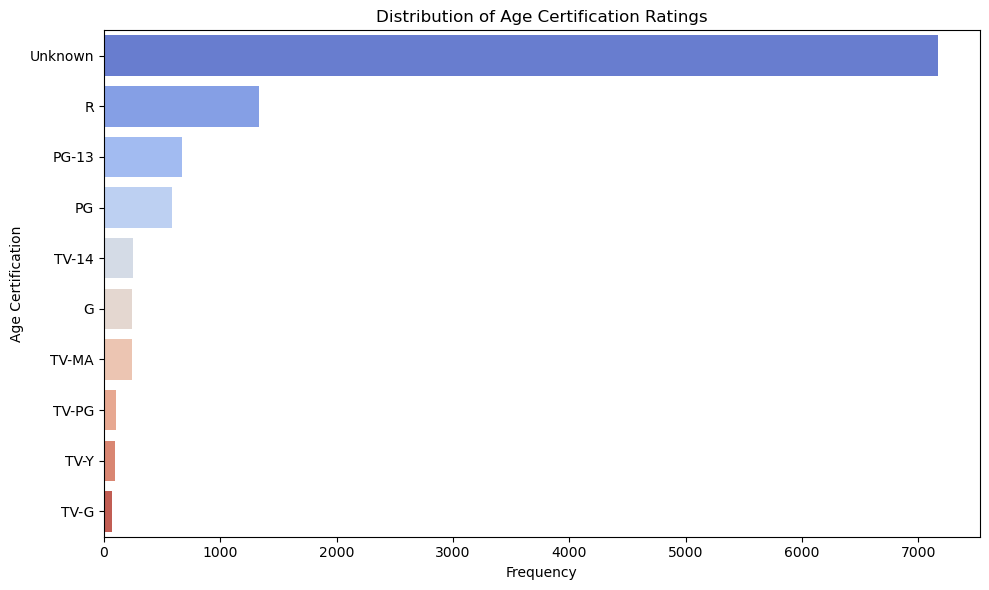

In [54]:
age_cert_counts = df['Age_certification'].value_counts().head(10) # Take top 10 in case there are many unique values
plt.figure(figsize=(10, 6))
sns.barplot(x=age_cert_counts.values, y=age_cert_counts.index, palette="coolwarm")
plt.title("Distribution of Age Certification Ratings")
plt.xlabel("Frequency")
plt.ylabel("Age Certification")
plt.tight_layout()
age_cert_plot = io.BytesIO()
plt.savefig(age_cert_plot, format='png')
plt.close()


In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Trending_Score'], y=df['Imdb_score'], alpha=0.5)
plt.title("Trending Score vs. IMDb Score")
plt.xlabel("Trending Score")
plt.ylabel("IMDb Score")
plt.tight_layout()
trending_imdb_plot = io.BytesIO()
plt.savefig(trending_imdb_plot, format='png')
plt.close()


KeyError: 'Imdb_score'

<Figure size 800x600 with 0 Axes>

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\1024992949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette="viridis")


NameError: name 'io' is not defined

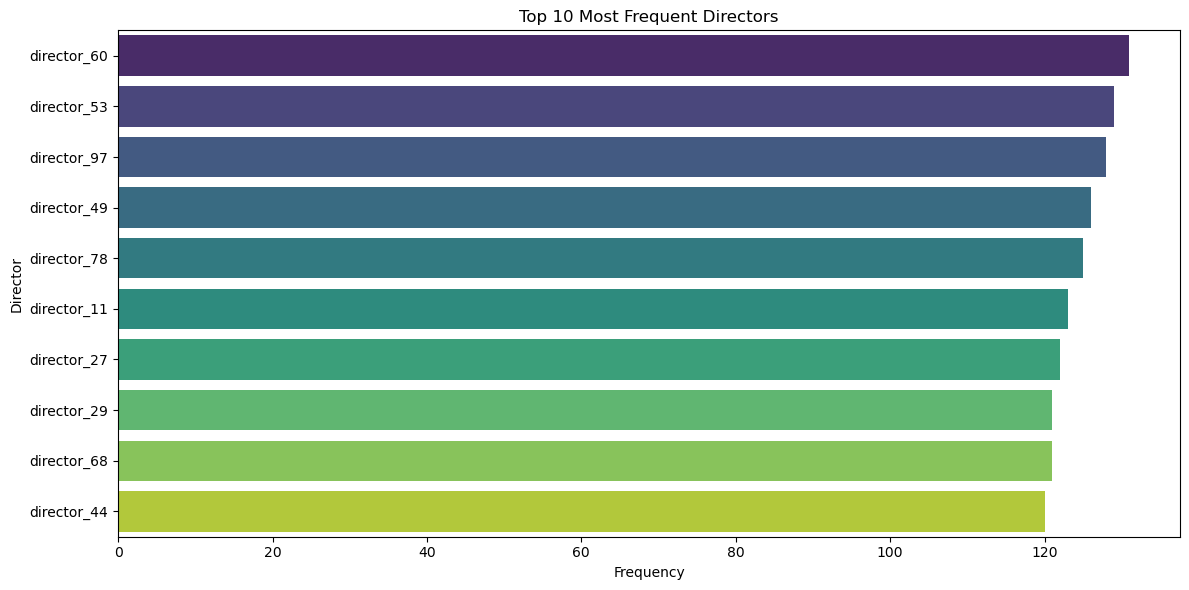

In [56]:
director_counts = df['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette="viridis")
plt.title("Top 10 Most Frequent Directors")
plt.xlabel("Frequency")
plt.ylabel("Director")
plt.tight_layout()
director_counts_plot = io.BytesIO()
plt.savefig(director_counts_plot, format='png')
plt.close()


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Feature Extraction from Text Data
# Extract features from 'Genres' using MultiLabelBinarizer
df['Genres'] = df['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_)
df = pd.concat([df, genres_encoded], axis=1)

# Extract features from 'Keywords_Tags' using TF-IDF
tfidf = TfidfVectorizer(max_features=50, stop_words='english')
keywords_tfidf = tfidf.fit_transform(df['Keywords_Tags'])
keywords_tfidf_df = pd.DataFrame(keywords_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df, keywords_tfidf_df], axis=1)

# 2. Feature Transformation
# Normalize numerical features
numerical_columns = ['Release_Year', 'Duration', 'Seasons', 'Rating', 'Imdb_Votes', 'Tmdb_Popularity', 'Tmdb_Score', 'Watch_Duration', 'User_Rating', 'Trending_Score', 'User_Age']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 3. Feature Creation
# Create a feature for the number of genres per content
df['Num_Genres'] = df['Genres'].apply(len)

# Create a feature for the number of production countries
df['Num_Production_Countries'] = df['Production_Countries'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

# Create a feature for the number of cast members
df['Num_Cast'] = df['Cast'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

# Create a feature for the number of directors
df['Num_Directors'] = df['Director'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

# 4. Time-Based Features
# Create a feature for the age of the content (current year - release year)
current_year = pd.Timestamp.now().year
df['Content_Age'] = current_year - df['Release_Year']

# 5. User Behavior Features
# Create a feature for the average watch duration per user
user_avg_watch_duration = df.groupby('User_ID')['Watch_Duration'].mean().reset_index()
user_avg_watch_duration.rename(columns={'Watch_Duration': 'Avg_Watch_Duration'}, inplace=True)
df = pd.merge(df, user_avg_watch_duration, on='User_ID', how='left')

# Create a feature for the total watch duration per user
user_total_watch_duration = df.groupby('User_ID')['Watch_Duration'].sum().reset_index()
user_total_watch_duration.rename(columns={'Watch_Duration': 'Total_Watch_Duration'}, inplace=True)
df = pd.merge(df, user_total_watch_duration, on='User_ID', how='left')

# 6. Content Popularity Features
# Create a feature for the average rating per content
content_avg_rating = df.groupby('Id')['User_Rating'].mean().reset_index()
content_avg_rating.rename(columns={'User_Rating': 'Avg_Content_Rating'}, inplace=True)
df = pd.merge(df, content_avg_rating, on='Id', how='left')

# Create a feature for the total number of ratings per content
content_total_ratings = df.groupby('Id')['User_Rating'].count().reset_index()
content_total_ratings.rename(columns={'User_Rating': 'Total_Content_Ratings'}, inplace=True)
df = pd.merge(df, content_total_ratings, on='Id', how='left')

# 7. Save the Engineered Dataset
df.to_csv('engineered_dataset.csv', index=False)


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [28]:
df['Genres'] = df['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


In [29]:
df['Keywords_Tags'] = df['Keywords_Tags'].fillna('')  # Handle NaNs before TF-IDF
tfidf = TfidfVectorizer(max_features=50, stop_words='english')
keywords_tfidf = tfidf.fit_transform(df['Keywords_Tags'])
keywords_tfidf_df = pd.DataFrame(keywords_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df, keywords_tfidf_df], axis=1)


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns
numerical_columns = ['Release_Year', 'Duration', 'Seasons', 'Rating', 'Imdb_Votes', 
                     'Tmdb_Popularity', 'Tmdb_Score', 'Watch_Duration', 'User_Rating', 
                     'Trending_Score', 'User_Age']

# Filter only existing numerical columns in df
existing_columns = [col for col in numerical_columns if col in df.columns]

# Convert columns to numeric (handles errors gracefully)
df[existing_columns] = df[existing_columns].apply(pd.to_numeric, errors='coerce')

# Handle NaN values by filling with column mean
df[existing_columns] = df[existing_columns].fillna(df[existing_columns].mean())

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[existing_columns] = scaler.fit_transform(df[existing_columns])

print("Numerical columns successfully normalized.")


Numerical columns successfully normalized.


In [31]:
df['Num_Genres'] = df['Genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [32]:
# Check if the required columns exist before applying transformations
if 'Production_Countries' in df.columns:
    df['Num_Production_Countries'] = df['Production_Countries'].astype(str).apply(lambda x: len(x.split(', ')) if x.strip() else 0)

if 'Cast' in df.columns:
    df['Num_Cast'] = df['Cast'].astype(str).apply(lambda x: len(x.split(', ')) if x.strip() else 0)

if 'Director' in df.columns:
    df['Num_Directors'] = df['Director'].astype(str).apply(lambda x: len(x.split(', ')) if x.strip() else 0)


In [33]:
df['User_ID'] = df['User_ID'].fillna('Unknown')  # Replace NaNs in User_ID if necessary
user_avg_watch_duration = df.groupby('User_ID', as_index=False)['Watch_Duration'].mean().rename(
    columns={'Watch_Duration': 'Avg_Watch_Duration'}
)
df = df.merge(user_avg_watch_duration, on='User_ID', how='left')

user_total_watch_duration = df.groupby('User_ID', as_index=False)['Watch_Duration'].sum().rename(
    columns={'Watch_Duration': 'Total_Watch_Duration'}
)
df = df.merge(user_total_watch_duration, on='User_ID', how='left')


In [34]:
df['Id'] = df['Id'].fillna('Unknown')  # Replace NaNs in Id if necessary
content_avg_rating = df.groupby('Id', as_index=False)['User_Rating'].mean().rename(
    columns={'User_Rating': 'Avg_Content_Rating'}
)
df = df.merge(content_avg_rating, on='Id', how='left')

content_total_ratings = df.groupby('Id', as_index=False)['User_Rating'].count().rename(
    columns={'User_Rating': 'Total_Content_Ratings'}
)
df = df.merge(content_total_ratings, on='Id', how='left')


In [35]:
if not df.empty:
    df.to_csv('engineered_dataset.csv', index=False)
else:
    print("Warning: DataFrame is empty, not saving.")


# Machine learning

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


# 1. Collaborative Filtering (K-Nearest Neighbors)
# Prepare data for collaborative filtering
collab_data = df[['User_ID', 'Id', 'User_Rating']].dropna()

# Aggregate duplicate entries by taking the mean of User_Rating
collab_data = collab_data.groupby(['User_ID', 'Id'], as_index=False)['User_Rating'].mean()

# Create a user-item matrix
user_item_matrix = collab_data.pivot(index='User_ID', columns='Id', values='User_Rating').fillna(0)

# Train KNN model for collaborative filtering
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_item_matrix)

# Function to get collaborative filtering recommendations
def collaborative_recommendations(user_id, top_n=10):
    user_index = user_item_matrix.index.get_loc(user_id)
    distances, indices = knn_model.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=top_n+1)
    recommendations = []
    for i in range(1, len(distances.flatten())):  # Exclude the user itself
        content_id = user_item_matrix.columns[indices.flatten()[i]]
        recommendations.append((content_id, distances.flatten()[i]))
    return recommendations
user_id = 'U1433'  # Replace with a valid user ID from your dataset
collab_recommendations = collaborative_recommendations(user_id)
print(f"Collaborative Recommendations for User {user_id}:")
print(collab_recommendations)

C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Collaborative Recommendations for User U1433:
[('tm27163', 1.0), ('tm272005', 1.0), ('tm271526', 1.0), ('tm271564', 1.0), ('tm271422', 1.0), ('tm272000', 1.0), ('tm2721', 1.0), ('tm271387', 1.0), ('tm272118', 1.0), ('tm27151', 1.0)]


In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Step 1: Data Preprocessing
# Select only numeric columns for simplicity (you can include encoded categorical columns later)
numerical_columns = [
    'Watch_Duration', 'User_Rating', 'Tmdb_popularity', 'Tmdb_score',
    'Imdb_votes', 'Rating', 'Trending_Score', 'User_Age'
]

# Filter the dataset to include only numerical columns
data = data[numerical_columns + ['Seasonal_Popularity']]  # Add target column

# Encode the target variable ('Seasonal_Popularity') if it's categorical
label_encoder = LabelEncoder()
data['Seasonal_Popularity'] = label_encoder.fit_transform(data['Seasonal_Popularity'])

# Handle missing values (if any)
data = data.dropna()

# Separate features (X) and target (y)
X = data.drop(columns=['Seasonal_Popularity'])
y = data['Seasonal_Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
# Define multiple models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Step 4: Hyperparameter Tuning (Example for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the tuned model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(f"Tuned Classification Report:\n{classification_report(y_test, y_pred_tuned)}")
print(f"Tuned Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tuned)}")

# Step 5: Save the Best Model (Optional)
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

Logistic Regression Accuracy: 0.3321
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.29      0.31       716
           1       0.32      0.28      0.30       723
           2       0.34      0.43      0.38       732

    accuracy                           0.33      2171
   macro avg       0.33      0.33      0.33      2171
weighted avg       0.33      0.33      0.33      2171

Confusion Matrix:
[[205 222 289]
 [208 200 315]
 [212 204 316]]

Random Forest Accuracy: 0.3551
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.31      0.33       716
           1       0.37      0.37      0.37       723
           2       0.36      0.38      0.37       732

    accuracy                           0.36      2171
   macro avg       0.35      0.35      0.35      2171
weighted avg       0.35      0.36      0.35      2171

Confusion Matrix:
[[224 224 268]
 [227 271 225]
 [209 247 2

Accuracy: 0.3584
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.40      0.38       723
           1       0.36      0.38      0.37       732
           2       0.35      0.29      0.32       716

    accuracy                           0.36      2171
   macro avg       0.36      0.36      0.36      2171
weighted avg       0.36      0.36      0.36      2171



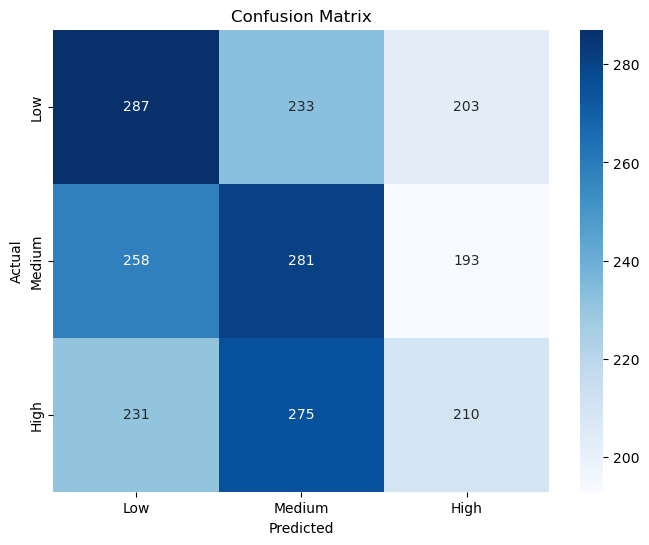

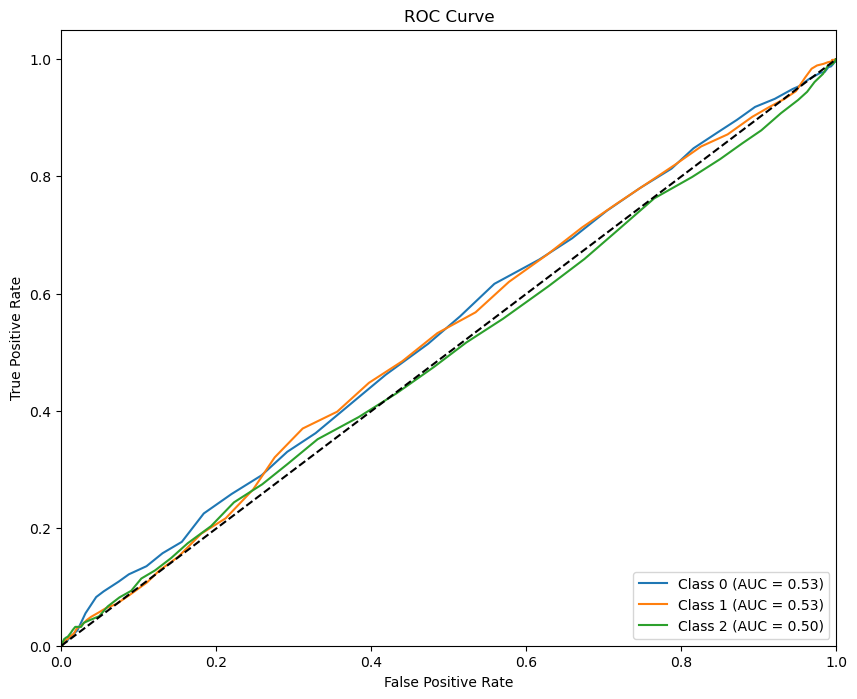

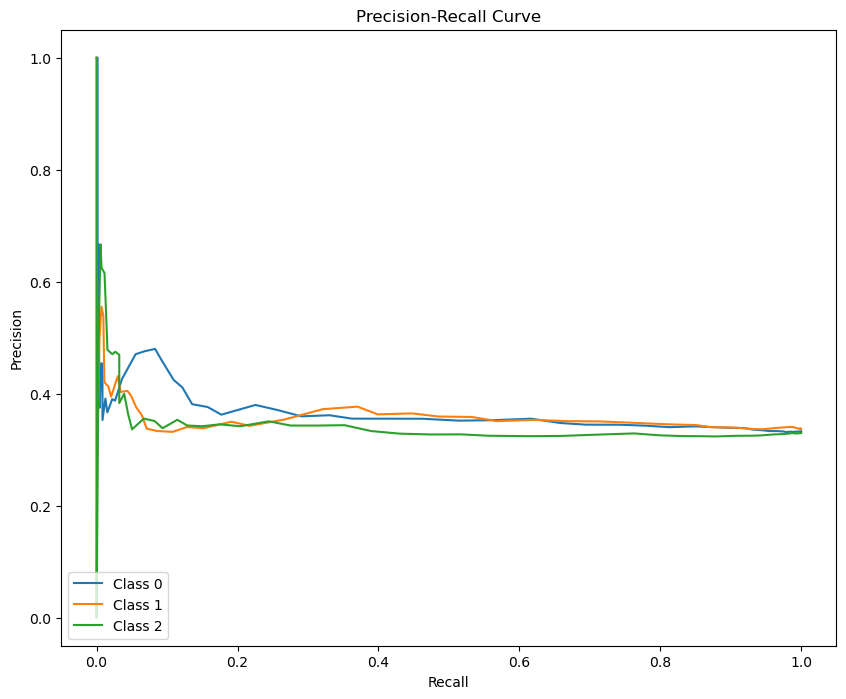

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\1444582906.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


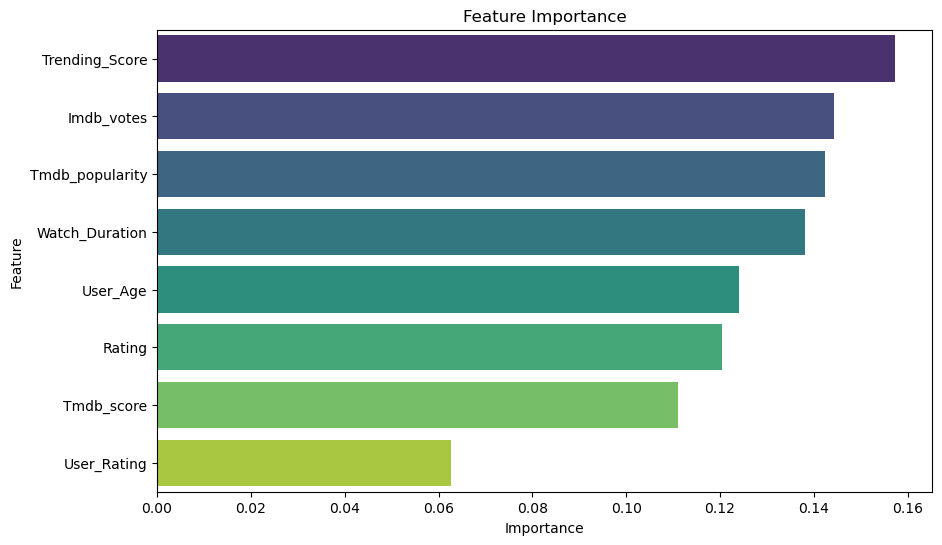

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\1444582906.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='coolwarm')


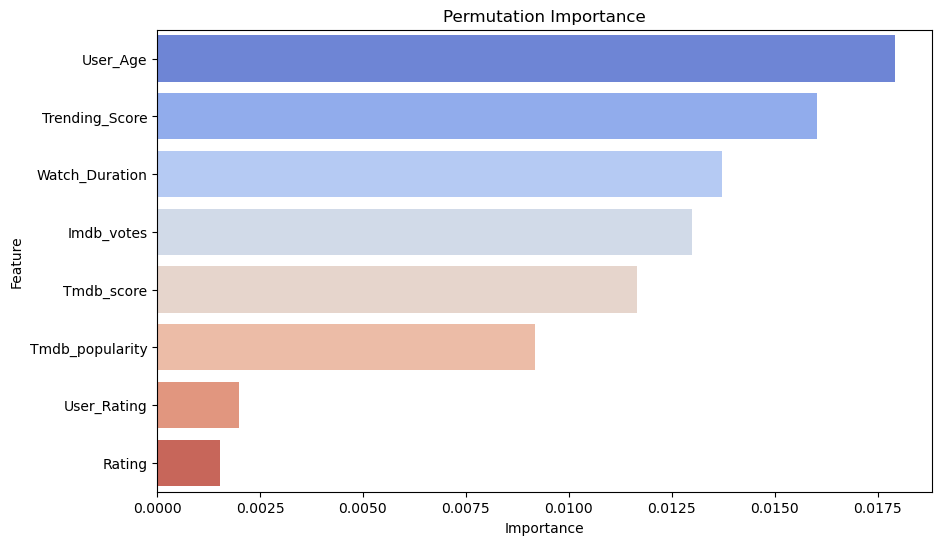

In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Load the dataset
data = pd.read_excel('Amazon-prime-keywords-enhanced.xlsx')

# Data Preprocessing
# Select only numeric columns for simplicity
numerical_columns = [
    'Watch_Duration', 'User_Rating', 'Tmdb_popularity', 'Tmdb_score',
    'Imdb_votes', 'Rating', 'Trending_Score', 'User_Age'
]

# Filter the dataset to include only numerical columns
data = data[numerical_columns + ['Seasonal_Popularity']]  # Add target column

# Encode the target variable ('Seasonal_Popularity') if it's categorical
data['Seasonal_Popularity'] = data['Seasonal_Popularity'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Handle missing values (if any)
data = data.dropna()

# Separate features (X) and target (y)
X = data.drop(columns=['Seasonal_Popularity'])
y = data['Seasonal_Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier (example model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# Feature Importance Plot
feature_importances = model.feature_importances_
features = numerical_columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.show()

# Permutation Importance
perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='coolwarm')
plt.title("Permutation Importance")
plt.show()

In [75]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 259.2 kB/s eta 0:08:02
   ---------------------------------------- 0.1/124.9 MB 363.1 kB/s eta 0:05:44
   ---------------------------------------- 0.1/124.9 MB 599.1 kB/s eta 0:03:29
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:01
   ---------------------------------------- 0.5/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.9/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 1.3/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 1.6/124.9 MB 4.0 MB/s eta 0:00:31
    --------------------------------------- 2.1/124.9 MB 4.6 MB/s eta 0:00:27
    ----

In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_excel('Amazon-prime-keywords-enhanced.xlsx')

# Step 1: Data Preprocessing
# Select numeric columns and encode the target variable
numerical_columns = [
    'Watch_Duration', 'User_Rating', 'Tmdb_popularity', 'Tmdb_score',
    'Imdb_votes', 'Rating', 'Trending_Score', 'User_Age'
]

# Filter the dataset to include only numerical columns
data = data[numerical_columns + ['Seasonal_Popularity']]  # Add target column

# Encode the target variable ('Seasonal_Popularity') if it's categorical
label_encoder = LabelEncoder()
data['Seasonal_Popularity'] = label_encoder.fit_transform(data['Seasonal_Popularity'])

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Separate features (X) and target (y)
X = data.drop(columns=['Seasonal_Popularity'])
y = data['Seasonal_Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Model Training with Hyperparameter Tuning
# Define models and their hyperparameter grids
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Support Vector Machine": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf'],
            "gamma": ['scale', 'auto']
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance']
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ['liblinear', 'lbfgs']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    }
}

# Train and evaluate each model with GridSearchCV for hyperparameter tuning
best_models = {}
for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Evaluate the best model on the test set
    y_pred = grid_search.best_estimator_.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Step 3: Select the Best Model
# Find the model with the highest accuracy
best_model_name = max(best_models, key=lambda k: accuracy_score(y_test, best_models[k].predict(X_test_scaled)))
best_model = best_models[best_model_name]
print(f"Best Model: {best_model_name}")

# Step 4: Save the Best Model (Optional)
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

Training Random Forest...
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Test Accuracy: 0.3622
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.32      0.33       689
           1       0.37      0.33      0.35       766
           2       0.37      0.43      0.40       718

    accuracy                           0.36      2173
   macro avg       0.36      0.36      0.36      2173
weighted avg       0.36      0.36      0.36      2173

Confusion Matrix:
[[222 218 249]
 [237 255 274]
 [188 220 310]]

Training Support Vector Machine...
Support Vector Machine Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Support Vector Machine Test Accuracy: 0.3300
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.27      0.29       689
           1       0.34      0.26      0.30       766
           2       0.33 

C:\Users\AJITHA REDDY\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:59:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGBoost Test Accuracy: 0.3396
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       689
           1       0.36      0.32      0.34       766
           2       0.33      0.38      0.36       718

    accuracy                           0.34      2173
   macro avg       0.34      0.34      0.34      2173
weighted avg       0.34      0.34      0.34      2173

Confusion Matrix:
[[218 205 266]
 [235 246 285]
 [220 224 274]]

Best Model: Random Forest
Best model saved as 'best_model.pkl'


# Hybrid recommendation

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Load the dataset
data = pd.read_excel('Amazon-prime-keywords-enhanced.xlsx')

# Step 1: Preprocess the Data
# Select relevant columns for recommendations
relevant_columns = [
    'Id', 'Title', 'Type', 'Genres', 'User_ID', 'Watch_History', 'User_Rating',
    'Search_Click_History', 'Skipped_Content', 'Keywords_Tags', 'Streaming_Availability'
]

# Filter the dataset to include only relevant columns
data = data[relevant_columns]

# Handle missing values (if any)
data = data.dropna()

# Encode the User_ID for collaborative filtering
user_encoder = {user: idx for idx, user in enumerate(data['User_ID'].unique())}
data['User_ID_Encoded'] = data['User_ID'].map(user_encoder)

# Encode the Item_ID (movie/TV show) for collaborative filtering
item_encoder = {item: idx for idx, item in enumerate(data['Id'].unique())}
data['Item_ID_Encoded'] = data['Id'].map(item_encoder)

# Step 2: Collaborative Filtering (User-Item Matrix)
# Create a user-item interaction matrix
user_item_matrix = data.pivot_table(
    index='User_ID_Encoded',
    columns='Item_ID_Encoded',
    values='User_Rating',
    fill_value=0
)

# Convert the matrix to a sparse format for efficiency
user_item_sparse = csr_matrix(user_item_matrix.values)

# Train a KNN model for collaborative filtering
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_item_sparse)

# Function to get similar users based on collaborative filtering
def get_similar_users(user_id_encoded, top_n=5):
    distances, indices = knn_model.kneighbors(
        user_item_sparse[user_id_encoded], n_neighbors=top_n + 1
    )
    similar_users = indices.flatten()[1:]  # Exclude the user themselves
    return similar_users

# Step 3: Content-Based Filtering (Item Similarity)
# Combine relevant text features for content-based filtering
data['Content_Features'] = (
    data['Genres'].fillna('') + ' ' +
    data['Keywords_Tags'].fillna('') + ' ' +
    data['Streaming_Availability'].fillna('')
)

# Use TF-IDF Vectorizer to transform text features into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Content_Features'])

# Compute cosine similarity between items
item_similarity = cosine_similarity(tfidf_matrix)

# Function to get similar items based on content-based filtering
def get_similar_items(item_id_encoded, top_n=5):
    similarities = item_similarity[item_id_encoded]
    similar_indices = np.argsort(-similarities)[1:top_n + 1]  # Exclude the item itself
    return similar_indices

# Step 4: Hybrid Recommendations
# Combine collaborative and content-based filtering
def hybrid_recommendations(user_id, top_n=10):
    # Get encoded user ID
    user_id_encoded = user_encoder.get(user_id)
    if user_id_encoded is None:
        return "User not found in the dataset."
    
    # Get similar users from collaborative filtering
    similar_users = get_similar_users(user_id_encoded, top_n=10)
    
    # Aggregate items watched by similar users
    recommended_items = []
    for user in similar_users:
        user_watched = user_item_matrix.iloc[user]
        recommended_items.extend(user_watched[user_watched > 0].index)
    
    # Remove duplicates and items already watched by the user
    user_watched_items = user_item_matrix.iloc[user_id_encoded]
    recommended_items = list(set(recommended_items) - set(user_watched_items[user_watched_items > 0].index))
    
    # Get similar items from content-based filtering
    similar_items = []
    for item in recommended_items:
        similar_items.extend(get_similar_items(item, top_n=5))
    
    # Combine and rank recommendations
    all_recommendations = list(set(recommended_items + similar_items))
    recommendation_scores = {}
    for item in all_recommendations:
        score = np.mean(item_similarity[item][recommended_items])  # Average similarity score
        recommendation_scores[item] = score
    
    # Sort recommendations by score
    sorted_recommendations = sorted(recommendation_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    recommended_item_ids = [item[0] for item in sorted_recommendations]
    
    # Map back to original item IDs and titles
    recommended_titles = data[data['Item_ID_Encoded'].isin(recommended_item_ids)]['Title'].tolist()
    return recommended_titles

# Example Usage
user_id = 'U1433'  # Replace with the desired user ID
recommendations = hybrid_recommendations(user_id, top_n=10)
print(f"Top 10 Recommendations for User {user_id}:")
for i, title in enumerate(recommendations, 1):
    print(f"{i}. {title}")

Top 10 Recommendations for User U1433:
1. Across the Line
2. Red Ribbon Blues
3. No Secrets
4. Wish You Were Here
5. Poola Rangadu
6. Kill Dil
7. Darling
8. Inherit the Viper
9. The 355
10. The Voyeurs


In [79]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.linear_model import LinearRegression  # Example regressor

# Load your dataset (replace with your dataset)
data = pd.read_excel('Amazon-prime-keywords-enhanced.xlsx')

# Preprocess the data (example preprocessing steps)
# Assume 'User_Rating' is the target variable for regression or classification
X = data[['Watch_Duration', 'Trending_Score', 'Seasonal_Popularity']]  # Features
y = data['User_Rating']  # Target variable

# Handle non-numeric features in X
# Encode 'Seasonal_Popularity' using Label Encoding (ordinal categories: Low, Medium, High)
label_encoder = LabelEncoder()
X['Seasonal_Popularity'] = label_encoder.fit_transform(X['Seasonal_Popularity'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification or regression model (example: Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model for classification tasks
def evaluate_classification(y_true, y_pred):
    print("Classification Evaluation Metrics:")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Evaluate the model for regression tasks
def evaluate_regression(y_true, y_pred):
    print("Regression Evaluation Metrics:")
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

# Check if the task is classification or regression
if len(np.unique(y)) <= 10:  # Assuming classification if there are <= 10 unique classes
    evaluate_classification(y_test, y_pred)
else:
    # For regression, use a regression model (example: Linear Regression)
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    y_reg_pred = reg_model.predict(X_test)
    evaluate_regression(y_test, y_reg_pred)

C:\Users\AJITHA REDDY\AppData\Local\Temp\ipykernel_20784\3005860712.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Seasonal_Popularity'] = label_encoder.fit_transform(X['Seasonal_Popularity'])


Classification Evaluation Metrics:
Accuracy: 0.1970
Precision: 0.1968
Recall: 0.1970
F1 Score: 0.1969
Confusion Matrix:
[[ 86  96  90  85  78]
 [ 80  92  85  83  91]
 [ 71  78  83 109  89]
 [ 91  86  85  92  86]
 [ 92  85  99  86  75]]
